# Hands On Genetic Algorithms

Reference for this notebook was Hands-On Genetic Algorithms with Python
Eyal Wirsansky.

This code was doing using as reference the codes in Kie's GitHub (https://github.com/kiecodes/genetic-algorithms) and ChatGPT.

Team:


*   Andrea Lima Blanca
*   Dicka Jamesina Lezama Alvarado
*   Georgina Zerón Cabrera
*   Diego Gasparis Escobedo





##Libraries for graphs


In [5]:
import networkx as nx
import random
from queue import Queue
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sys
import time


## Abstracion of the problem: Train station problem CDMX

In [6]:
# Creating the graph
graphMX = nx.Graph()

# Adding nodes to the graph
graphMX.add_nodes_from(
    ["El Rosario", "Instituto del Petroleo", "Deportivo 18 de Marzo", "Martin Carrera", "Politecnico", "La Raza",
     "Consulado", "Oceania", "Pantitlan", "Indios Verdes", "Guerrero", "Hidalgo", "Balderas", "Centro Medico", "Zapata",
     "Universidad", "Morelos", "Candelaria", "Jamaica", "Tacuba", "Tacubaya", "Mixcoac", "Barranca del Muerto",
     "Cuatro Caminos", "Bellas Artes", "Pino Suarez", "Chabacano", "Ermita", "Tasqueña", "Santa Anita", "Garibaldi",
     "San Lazaro", "Ciudad Azteca", "Salto del Agua", "Atlalilco", "Gomez Farias", "Tlahuac"])

# Adding edges to the graph with the respective line and segments
# Tacubaya
graphMX.add_edge("Tacubaya", "Tacuba", line_id="7 (Orange)", segments=5)
graphMX.add_edge("Tacubaya", "Balderas", line_id="1 (Pink)", segments=6)
graphMX.add_edge("Tacubaya", "Centro Medico", line_id="9 (Brown)", segments=3)
graphMX.add_edge("Tacubaya", "Mixcoac", line_id="7 (Orange)", segments=3)

# Balderas
graphMX.add_edge("Balderas", "Tacubaya", line_id="1, (Pink)", segments=6)
graphMX.add_edge("Balderas", "Hidalgo", line_id="3 (Olive)", segments=2)
graphMX.add_edge("Balderas", "Centro Medico", line_id="3 (Olive)", segments=3)
graphMX.add_edge("Balderas", "Salto del Agua", line_id="1 (Pink)", segments=1)

# Salto del Agua
graphMX.add_edge("Salto del Agua", "Bellas Artes", line_id="8 (Green)", segments=2)
graphMX.add_edge("Salto del Agua", "Balderas", line_id="1 (Pink)", segments=1)
graphMX.add_edge("Salto del Agua", "Pino Suarez", line_id="1 (Pink)", segments=2)
graphMX.add_edge("Salto del Agua", "Chabacano", line_id="8 (Green)", segments=3)

# Pino Suárez
graphMX.add_edge("Pino Suarez", "Bellas Artes", line_id="2 (Blue)", segments=3)
graphMX.add_edge("Pino Suarez", "Salto del Agua", line_id="1 (Pink)", segments=2)
graphMX.add_edge("Pino Suarez", "Candelaria", line_id="1 (Pink)", segments=2)
graphMX.add_edge("Pino Suarez", "Chabacano", line_id="2 (Blue)", segments=2)

# Candelaria
graphMX.add_edge("Candelaria", "Pino Suarez", line_id="1 (Pink)", segments=2)
graphMX.add_edge("Candelaria", "Morelos", line_id="4 (Cyan)", segments=1)
graphMX.add_edge("Candelaria", "San Lazaro", line_id="1 (Pink)", segments=1)
graphMX.add_edge("Candelaria", "Jamaica", line_id="4 (Cyan)", segments=2)

# San Lázaro
graphMX.add_edge("San Lazaro", "Candelaria", line_id="1 (Pink)", segments=1)
graphMX.add_edge("San Lazaro", "Morelos", line_id="B (GrayGreen)", segments=1)
graphMX.add_edge("San Lazaro", "Gomez Farias", line_id="B (GrayGreen)", segments=3)

# Pantitlán
graphMX.add_edge("Pantitlan", "Oceania", line_id="5 (Yellow)", segments=3)
graphMX.add_edge("Pantitlan", "Jamaica", line_id="9 (Brown)", segments=5)
graphMX.add_edge("Pantitlan", "Gomez Farias", line_id="1 (Pink)", segments=6)

# Mixcoac
graphMX.add_edge("Mixcoac", "Tacubaya", line_id="7 (Orange)", segments=3)
graphMX.add_edge("Mixcoac", "Zapata", line_id="12 (Gold)", segments=3)
graphMX.add_edge("Mixcoac", "Barranca del Muerto", line_id="7 (Orange)", segments=1)

# Tacuba
graphMX.add_edge("Tacuba", "Tacubaya", line_id="7 (Orange)", segments=5)
graphMX.add_edge("Tacuba", "Hidalgo", line_id="2 (Blue)", segments=7)
graphMX.add_edge("Tacuba", "El Rosario", line_id="7 (Orange)", segments=4)
graphMX.add_edge("Tacuba", "Cuatro Caminos", line_id="2 (Blue)", segments=1)

# El Rosario
graphMX.add_edge("El Rosario", "Instituto del Petroleo", line_id="6 (Red)", segments=6)
graphMX.add_edge("El Rosario", "Tacuba", line_id="7 (Orange)", segments=4)

# Instituto del Petróleo
graphMX.add_edge("Instituto del Petroleo", "El Rosario", line_id="6 (Red)", segments=6)
graphMX.add_edge("Instituto del Petroleo", "La Raza", line_id="5 (Yellow)", segments=2)
graphMX.add_edge("Instituto del Petroleo", "Deportivo 18 de Marzo", line_id="6 (Red)", segments=2)
graphMX.add_edge("Instituto del Petroleo", "Politecnico", line_id="5 (Yellow)", segments=1)

# Deportivo 18 de Marzo
graphMX.add_edge("Deportivo 18 de Marzo", "Instituto del Petroleo", line_id="6 (Red)", segments=2)
graphMX.add_edge("Deportivo 18 de Marzo", "La Raza", line_id="3 (Olive)", segments=2)
graphMX.add_edge("Deportivo 18 de Marzo", "Martin Carrera", line_id="6 (Red)", segments=2)
graphMX.add_edge("Deportivo 18 de Marzo", "Indios Verdes", line_id="3 (Olive)", segments=1)

# Martin Carrera
graphMX.add_edge("Martin Carrera", "Deportivo 18 de Marzo", line_id="6 (Red)", segments=2)
graphMX.add_edge("Martin Carrera", "Consulado", line_id="4 (Cyan)", segments=3)

# Consulado
graphMX.add_edge("Consulado", "Martin Carrera", line_id="4 (Cyan)", segments=3)
graphMX.add_edge("Consulado", "La Raza", line_id="5 (Yellow)", segments=3)
graphMX.add_edge("Consulado", "Oceania", line_id="5 (Yellow)", segments=3)
graphMX.add_edge("Consulado", "Morelos", line_id="4 (Cyan)", segments=2)

# Morelos
graphMX.add_edge("Morelos", "Consulado", line_id="4 (Cyan)", segments=2)
graphMX.add_edge("Morelos", "Candelaria", line_id="4 (Cyan)", segments=1)
graphMX.add_edge("Morelos", "Garibaldi", line_id="B (GrayGreen)", segments=3)
graphMX.add_edge("Morelos", "San Lazaro", line_id="B (GrayGreen)", segments=1)

# Candelaria
graphMX.add_edge("Candelaria", "Morelos", line_id="4 (Cyan)", segments=1)
graphMX.add_edge("Candelaria", "San Lazaro", line_id="1 (Pink)", segments=1)
graphMX.add_edge("Candelaria", "Jamaica", line_id="4 (Cyan)", segments=3)
graphMX.add_edge("Candelaria", "Pino Suarez", line_id="1 (Pink)", segments=3)

# Jamaica
graphMX.add_edge("Jamaica", "Chabacano", line_id="9 (Brown)", segments=1)
graphMX.add_edge("Jamaica", "Candelaria", line_id="4 (Cyan)", segments=2)
graphMX.add_edge("Jamaica", "Pantitlan", line_id="9 (Brown)", segments=5)

# La Raza
graphMX.add_edge("La Raza", "Instituto del Petroleo", line_id="5 (Yellow)", segments=2)
graphMX.add_edge("La Raza", "Deportivo 18 de Marzo", line_id="3 (Olive)", segments=2)
graphMX.add_edge("La Raza", "Consulado", line_id="5 (Yellow)", segments=3)
graphMX.add_edge("La Raza", "Guerrero", line_id="3 (Olive)", segments=2)

# Guerrero
graphMX.add_edge("Guerrero", "Garibaldi", line_id="B (GrayGreen)", segments=1)
graphMX.add_edge("Guerrero", "Hidalgo", line_id="3 (Olive)", segments=1)
graphMX.add_edge("Guerrero", "La Raza", line_id="3 (Olive)", segments=2)

# Hidalgo
graphMX.add_edge("Hidalgo", "Guerrero", line_id="3 (Olive)", segments=1)
graphMX.add_edge("Hidalgo", "Tacuba", line_id="2 (Blue)", segments=7)
graphMX.add_edge("Hidalgo", "Balderas", line_id="3 (Olive)", segments=2)
graphMX.add_edge("Hidalgo", "Bellas Artes", line_id="2 (Blue)", segments=1)

# Centro Médico
graphMX.add_edge("Centro Medico", "Balderas", line_id="3 (Olive)", segments=3)
graphMX.add_edge("Centro Medico", "Tacubaya", line_id="9 (Brown)", segments=3)
graphMX.add_edge("Centro Medico", "Chabacano", line_id="9 (Brown)", segments=2)
graphMX.add_edge("Centro Medico", "Zapata", line_id="3 (Olive)", segments=4)

# Zapata
graphMX.add_edge("Zapata", "Mixcoac", line_id="12 (Gold)", segments=3)
graphMX.add_edge("Zapata", "Centro Medico", line_id="3 (Olive)", segments=4)
graphMX.add_edge("Zapata", "Ermita", line_id="12 (Gold)", segments=3)
graphMX.add_edge("Zapata", "Universidad", line_id="3 (Olive)", segments=2)

# Ermita
graphMX.add_edge("Ermita", "Zapata", line_id="12 (Gold)", segments=3)
graphMX.add_edge("Ermita", "Chabacano", line_id="2 (Blue)", segments=6)
graphMX.add_edge("Ermita", "Atlalilco", line_id="12 (Gold)", segments=2)
graphMX.add_edge("Ermita", "Tasqueña", line_id="2 (Blue)", segments=1)

# Chabacano
graphMX.add_edge("Chabacano", "Ermita", line_id="2 (Blue)", segments=6)
graphMX.add_edge("Chabacano", "Pino Suarez", line_id="2 (Blue)", segments=2)
graphMX.add_edge("Chabacano", "Jamaica", line_id="9 (Brown)", segments=1)
graphMX.add_edge("Chabacano", "Centro Medico", line_id="9 (Brown)", segments=2)
graphMX.add_edge("Chabacano", "Salto del Agua", line_id="8 (Green)", segments=3)
graphMX.add_edge("Chabacano", "Santa Anita", line_id="8 (Green)", segments=2)

# Bellas Artes
graphMX.add_edge("Bellas Artes", "Pino Suarez", line_id="2 (Blue)", segments=3)
graphMX.add_edge("Bellas Artes", "Hidalgo", line_id="2 (Blue)", segments=1)
graphMX.add_edge("Bellas Artes", "Garibaldi", line_id="8 (Green)", segments=1)
graphMX.add_edge("Bellas Artes", "Salto del Agua", line_id="8 (Green)", segments=2)

# Garibaldi
graphMX.add_edge("Garibaldi", "Bellas Artes", line_id="8 (Green)", segments=1)
graphMX.add_edge("Garibaldi", "Guerrero", line_id="B (GrayGreen)", segments=1)
graphMX.add_edge("Garibaldi", "Morelos", line_id="B (GrayGreen)", segments=3)

# Santa Anita
graphMX.add_edge("Santa Anita", "Chabacano", line_id="8 (Green)", segments=2)
graphMX.add_edge("Santa Anita", "Jamaica", line_id="4 (Cyan)", segments=1)
graphMX.add_edge("Santa Anita", "Atlalilco", line_id="8 (Green)", segments=6)

# Oceania
graphMX.add_edge("Oceania", "Pantitlan", line_id="5 (Yellow)", segments=3)
graphMX.add_edge("Oceania", "Consulado", line_id="5 (Yellow)", segments=3)
graphMX.add_edge("Oceania", "San Lazaro", line_id="B (GrayGreen)", segments=3)
graphMX.add_edge("Oceania", "Ciudad Azteca", line_id="B (GrayGreen)", segments=1)

# Atlalilco
graphMX.add_edge("Atlalilco", "Santa Anita", line_id="8 (Green)", segments=6)
graphMX.add_edge("Atlalilco", "Ermita", line_id="12 (Gold)", segments=2)
graphMX.add_edge("Atlalilco", "Tlahuac", line_id="12 (Gold)", segments=1)

# Barranca del Muerto
graphMX.add_edge("Barranca del Muerto", "Mixcoac", line_id="7 (Orange)", segments=1)

# Universidad
graphMX.add_edge("Universidad", "Zapata", line_id="3 (Olive)", segments=2)

# Tasqueña
graphMX.add_edge("Tasqueña", "Ermita", line_id="2 (Blue)", segments=1)

# Tláhuac
graphMX.add_edge("Tlahuac", "Atlalilco", line_id="12 (Gold)", segments=1)

# Indios Verdas
graphMX.add_edge("Indios Verdes", "Deportivo 18 de Marzo", line_id="3 (Olive)", segments=1)

# Politecnico
graphMX.add_edge("Politecnico", "Instituto del Petroleo", line_id="5 (Yellow)", segments=1)

# Ciudad Azteca
graphMX.add_edge("Ciudad Azteca", "Oceania", line_id="B (GrayGreen)", segments=1)

# Cuatro Caminos
graphMX.add_edge("Cuatro Caminos", "Tacuba", line_id="2 (Blue)", segments=1)


print("Nodes in the graph:", graphMX.nodes())
print("Edges in the graph:", graphMX.edges(data=True))



Nodes in the graph: ['El Rosario', 'Instituto del Petroleo', 'Deportivo 18 de Marzo', 'Martin Carrera', 'Politecnico', 'La Raza', 'Consulado', 'Oceania', 'Pantitlan', 'Indios Verdes', 'Guerrero', 'Hidalgo', 'Balderas', 'Centro Medico', 'Zapata', 'Universidad', 'Morelos', 'Candelaria', 'Jamaica', 'Tacuba', 'Tacubaya', 'Mixcoac', 'Barranca del Muerto', 'Cuatro Caminos', 'Bellas Artes', 'Pino Suarez', 'Chabacano', 'Ermita', 'Tasqueña', 'Santa Anita', 'Garibaldi', 'San Lazaro', 'Ciudad Azteca', 'Salto del Agua', 'Atlalilco', 'Gomez Farias', 'Tlahuac']
Edges in the graph: [('El Rosario', 'Tacuba', {'line_id': '7 (Orange)', 'segments': 4}), ('El Rosario', 'Instituto del Petroleo', {'line_id': '6 (Red)', 'segments': 6}), ('Instituto del Petroleo', 'La Raza', {'line_id': '5 (Yellow)', 'segments': 2}), ('Instituto del Petroleo', 'Deportivo 18 de Marzo', {'line_id': '6 (Red)', 'segments': 2}), ('Instituto del Petroleo', 'Politecnico', {'line_id': '5 (Yellow)', 'segments': 1}), ('Deportivo 18 de 

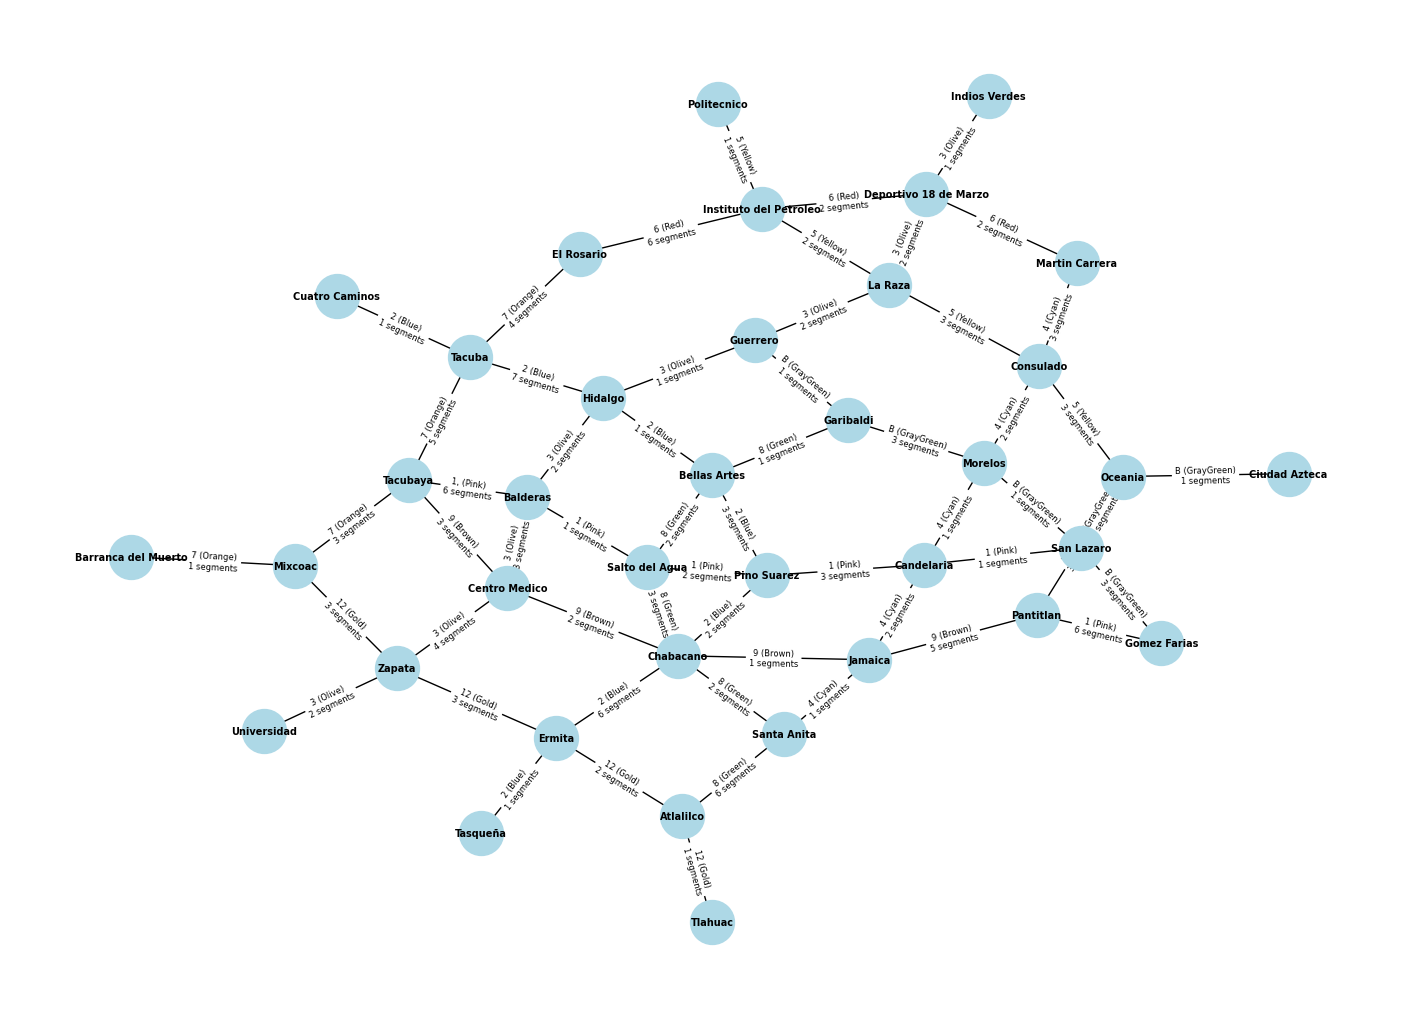

In [23]:
# Edge labels should show the line ID and the number of segments, indicating time or distance
edge_labels = {(u, v): f"{data['line_id']}\n{data['segments']} segments" for u, v, data in graphMX.edges(data=True)}

# Plotting
plt.figure(figsize=(14, 10))
pos_cdmx = nx.kamada_kawai_layout(graphMX)
nx.draw(graphMX, pos_cdmx, with_labels=True, node_color='lightblue', font_weight='bold', font_size=7, node_size=1000)
nx.draw_networkx_edge_labels(graphMX, pos_cdmx, edge_labels=edge_labels, font_size=6)
plt.show()

## Genetic Algorithm Implementation

### Initialization

#### Fitness Function

The goal is to arrive to x station to y station in the shortest possible time.


In [7]:
def fitness(path, graph):
    total_segments = 0
    valid_path = True
    line_change_penalty = 3  # Penalty for changing lines
    previous_line_id = None

    # Iterate over each pair of nodes in the path
    for i in range(len(path) - 1):
        # If the pair forms a valid edge in the graph
        if graph.has_edge(path[i], path[i + 1]):
            edge_data = graph[path[i]][path[i + 1]]
            total_segments += edge_data['segments']

            # Check for line change and add penalty
            if previous_line_id and previous_line_id != edge_data['line_id']:
                total_segments += line_change_penalty

            previous_line_id = edge_data['line_id']
        else:
            valid_path = False
            break

    # Return the fitness score
    return 1 / total_segments if total_segments > 0 and valid_path else float('inf')

#### Initialize population

Random initialization

In [8]:
def random_path(graph, start, end):
    # Make sure the start and end nodes are in the same component
    if not nx.has_path(graph, start, end):
        return None

    path = [start]
    while path[-1] != end:
        current = path[-1]
        neighbors = list(graph.neighbors(current))
        # Filter out the neighbors that would form a loop
        neighbors = [node for node in neighbors if node not in path]
        if not neighbors:
            # Stuck at a node with no valid moves, start over
            return random_path(graph, start, end)
        next_node = random.choice(neighbors)
        path.append(next_node)
    return path

def initialize_population_random(pop_size, graph, start, end):
    population = []
    while len(population) < pop_size:
        path = random_path(graph, start, end)
        if path:
            population.append(path)
    return population

Initialization from a modification of bfs path


In [9]:
def bfs_path(graph, start, end):
    # Create a queue and add the start node
    queue = Queue()
    queue.put([start])
    visited = set()
    # Continue until the queue is empty
    while not queue.empty():
        path = queue.get()
        last_node = path[-1]
        # If the last node is the end node, return the path
        if last_node == end:
            return path
        if last_node not in visited:
            visited.add(last_node)
            # Add all unvisited neighbors to the queue
            for neighbor in graph.neighbors(last_node):
                if neighbor not in path:
                    new_path = list(path) + [neighbor]
                    queue.put(new_path)
    return None

def initialize_population_bfs(pop_size, graph, start, end):
    population = []
    # Generate paths using BFS until the population size is reached
    while len(population) < pop_size:
        path = bfs_path(graph, start, end)
        if path:
            # Randomly choose a segment of the path to alter
            idx1 = random.randint(0, len(path) - 2)
            idx2 = random.randint(idx1, len(path) - 1)
            segment = path[idx1:idx2+1]

            # Generate alternative routes for the chosen segment
            alternative_routes = list(nx.all_simple_paths(graph, segment[0], segment[-1]))
            if alternative_routes:
                # Randomly choose an alternative route
                new_route = random.choice(alternative_routes)

                # Replace the original segment with the new route
                path = path[:idx1] + new_route + path[idx2+1:]

            population.append(path)
    return population

#### Crossover

In [10]:
def is_valid_path(path, graph):
    return all(graph.has_edge(path[i], path[i+1]) for i in range(len(path)-1))

In [11]:
def crossover(parent1, parent2, graph):
    # Find common nodes between parent1 and parent2
    common_nodes = set(parent1) & set(parent2)

    # If there are no common nodes, return the original parents
    if not common_nodes:
        return parent1, parent2

    # Randomly select a common node for crossover
    crossover_node = random.choice(list(common_nodes))

    # Find the index of the crossover node in both parents
    idx1 = parent1.index(crossover_node)
    idx2 = parent2.index(crossover_node)

    # Create new offspring by swapping the segments after the crossover node
    new_child1 = parent1[:idx1 + 1] + parent2[idx2 + 1:]
    new_child2 = parent2[:idx2 + 1] + parent1[idx1 + 1:]

    # If the new offspring are not valid paths, return the original parents
    if not is_valid_path(new_child1, graph) or not is_valid_path(new_child2, graph):
        return parent1, parent2

    # Return the new offspring
    return new_child1, new_child2

#### Mutation

In [12]:
def mutate(path, rate, graph):
    # Apply mutation with a given probability
    if random.random() < rate and len(path) > 2:
        # Randomly select a segment of the path
        idx = random.randint(0, len(path) - 3)
        # Generate alternative routes for the chosen segment
        alternative_routes = list(nx.all_simple_paths(graph, path[idx], path[idx + 2], cutoff=3))
        if alternative_routes:
            # Randomly choose an alternative route
            new_route = random.choice(alternative_routes)
            if len(new_route) > 2:
                # Replace the original segment with the new route
                path = path[:idx + 1] + new_route[1:-1] + path[idx + 2:]
    return path

#### Tournament selection

In [13]:
def tournament_selection(population, fitness_scores, size=3):
    # Adjust the tournament size if it's larger than the population
    if len(population) < size:
        size = len(population)
    if size == 0:
        raise ValueError("Population is empty, cannot perform selection.")
    # Randomly select individuals for the tournament
    tournament = random.sample(population, size)
    try:
        # The individual with the highest fitness wins the tournament
        best_individual = max(tournament, key=lambda x: fitness_scores[tuple(x)])
    except KeyError as e:
        print("Key error with path:", e)
        for p in tournament:
            print(f"Path: {p}, Score available: {tuple(p) in fitness_scores}")
        raise
    return best_individual

## Run of evolution


In [14]:
def genetic_algorithm(graph, start, end, generations=100, population_size=100, init_mode='bfs',t=1.0, t_min=0.001, alpha=0.9):
    # Initialize the population based on the chosen mode
    if init_mode == 'random':
        population = initialize_population_random(population_size, graph, start, end)
    elif init_mode == 'bfs':
        population = initialize_population_bfs(population_size, graph, start, end)  # Assuming BFS-based init
    else:
        raise ValueError("Invalid initialization mode. Choose 'bfs' or 'random'.")

    for _ in range(generations):
        # Calculate fitness scores for the population
        fitness_scores = {tuple(p): fitness(p, graph) for p in population}
        new_population = []
        while len(new_population) < population_size:
            # Select parents using tournament selection
            parent1 = tournament_selection(population, fitness_scores)
            parent2 = tournament_selection(population, fitness_scores)
            # Generate offspring through crossover
            child1, child2 = crossover(parent1, parent2, graph)
            # Apply mutation to the offspring
            mutated_child1 = mutate(child1, t, graph)
            mutated_child2 = mutate(child2, t, graph)
            # Add the offspring to the new population
            new_population.extend([mutated_child1, mutated_child2])
        # Replace the old population with the new population
        population = [p for p in new_population if is_valid_path(p, graph)]
        # Decrease the temperature
        t = t * alpha
        if t < t_min:
            break
    # Find the best individual in the population
    best_path = max(population, key=lambda x: fitness(x, graph))
    best_fitness = fitness(best_path, graph)
    # Calculate the total distance of the best path
    total_distance = sum(graph[best_path[i]][best_path[i + 1]]['segments'] for i in range(len(best_path) - 1))
    return best_path, best_fitness, total_distance

In [15]:
best_path, best_fitness, total_distance = genetic_algorithm(graphMX, 'El Rosario', 'San Lazaro', 50, 10)
print("Best Path:", best_path)
print("Best Fitness:", best_fitness)
print("Total Distance: ", total_distance)

Best Path: ['El Rosario', 'Instituto del Petroleo', 'Deportivo 18 de Marzo', 'Martin Carrera', 'Consulado', 'Morelos', 'San Lazaro']
Best Fitness: 0.045454545454545456
Total Distance:  16


## Testing

In [45]:
# Range for generations and population sizes
generation_range = [1 ,10, 30, 50]
population_range = [10, 15, 20, 25]

In [19]:
# Ploting influence of parameters
def plot(start, end, mode = 'bfs'):
    fitness_results = np.zeros((len(generation_range), len(population_range)))
    best_fitness = -np.inf
    best_path = None
    total_runs = len(generation_range) * len(population_range)
    run_count = 0
    start_time = time.time()

    for i, gens in enumerate(generation_range):
        for j, pop_size in enumerate(population_range):
            path, fitness_value,_ = genetic_algorithm(graphMX, start, end, generations=gens, population_size=pop_size, init_mode=mode)
            fitness_results[i, j] = fitness_value
            if fitness_value > best_fitness:
                best_fitness = fitness_value
                best_path = path
            run_count += 1

            # Print progress
            sys.stdout.write(f"\rProgress: {run_count}/{total_runs} | Currently at {gens} generations with population size {pop_size}")
            sys.stdout.flush()  # Flush the output buffer to ensure the message is displayed

    end_time = time.time()
    print("\nAll simulations completed.")
    print(f"Total simulation time: {end_time - start_time:.5f} seconds.")  # Print total time

    # Display statistics
    mean_fitness = np.mean(fitness_results)
    median_fitness = np.median(fitness_results)
    std_dev_fitness = np.std(fitness_results)
    print(f"Mean Fitness: {mean_fitness:.2f}")
    print(f"Median Fitness: {median_fitness:.2f}")
    print(f"Standard Deviation of Fitness: {std_dev_fitness:.2f}")
    print(f"Best Fitness: {best_fitness:.2f}")
    print(f"Best Path: {best_path}")

    # Plotting 3D Surface
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(131, projection='3d')
    X, Y = np.meshgrid(population_range, generation_range)
    ax1.plot_surface(X, Y, fitness_results, cmap='viridis')
    ax1.set_xlabel('Population Size')
    ax1.set_ylabel('Generations')
    ax1.set_zlabel('Fitness')

    # Plotting Population Size vs Fitness (average over generations)
    ax2 = fig.add_subplot(132)
    average_fitness_per_pop_size = np.mean(fitness_results, axis=0)
    ax2.plot(population_range, average_fitness_per_pop_size, marker='o')
    ax2.set_xlabel('Population Size')
    ax2.set_ylabel('Average Fitness')
    ax2.set_title('Population Size vs. Average Fitness')

    # Plotting Generations vs Fitness (average over population sizes)
    ax3 = fig.add_subplot(133)
    average_fitness_per_gen = np.mean(fitness_results, axis=1)
    ax3.plot(list(generation_range), average_fitness_per_gen, marker='o')
    ax3.set_xlabel('Generations')
    ax3.set_ylabel('Average Fitness')
    ax3.set_title('Generations vs. Average Fitness')

    plt.tight_layout()
    plt.show()


Progress: 16/16 | Currently at 50 generations with population size 25
All simulations completed.
Total simulation time: 657.14338 seconds.
Mean Fitness: 0.04
Median Fitness: 0.05
Standard Deviation of Fitness: 0.00
Best Fitness: 0.05
Best Path: ['El Rosario', 'Instituto del Petroleo', 'Deportivo 18 de Marzo', 'Martin Carrera', 'Consulado', 'Morelos', 'San Lazaro']


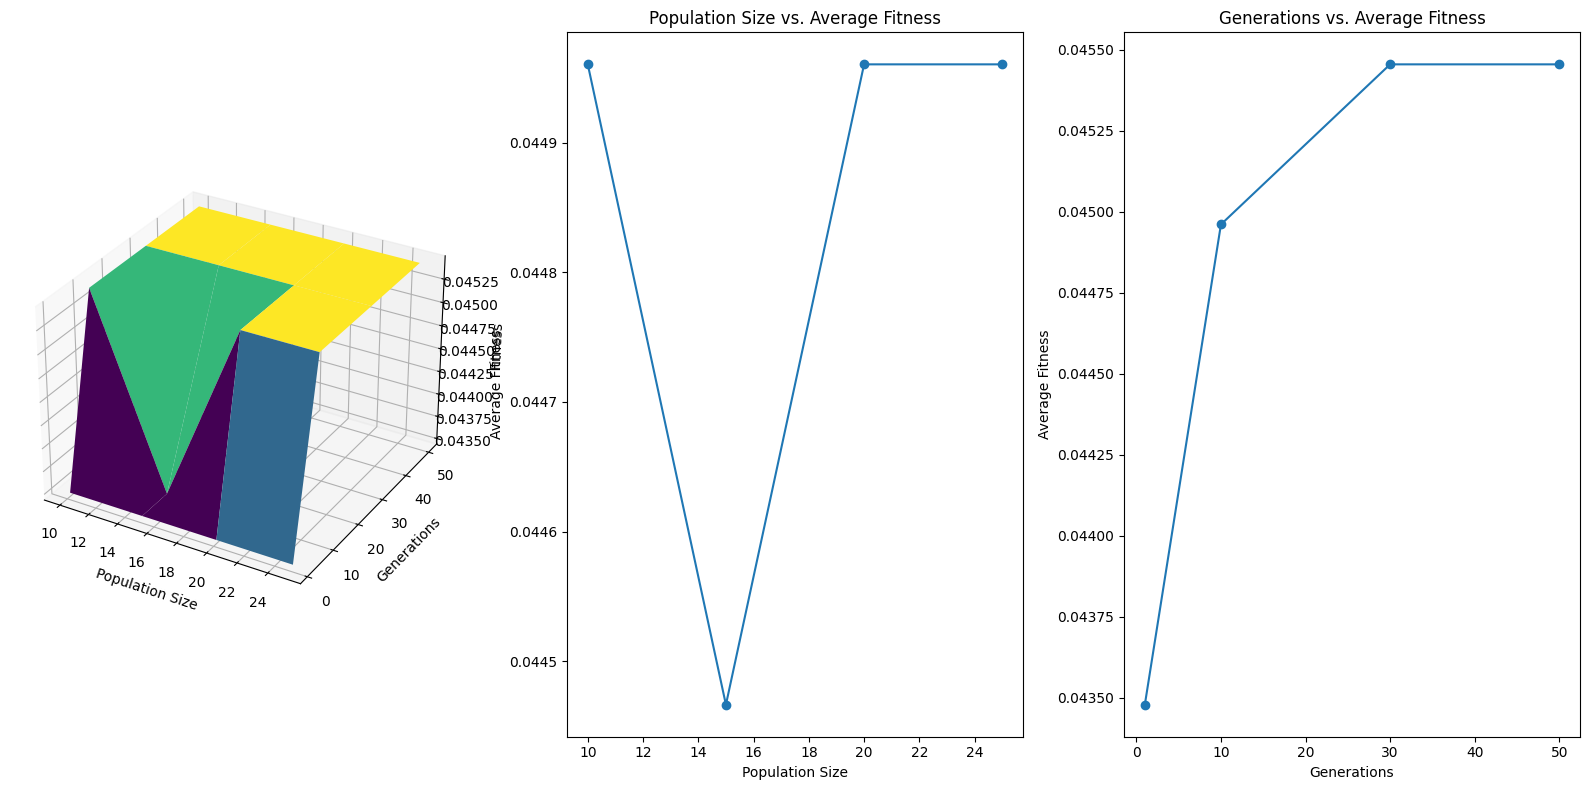

In [48]:
plot('El Rosario', 'San Lazaro')

Progress: 9801/9801 | Currently at 99 generations with population size 99
All simulations completed.
Total simulation time: 1092.75322 seconds.
Mean Fitness: 0.04
Median Fitness: 0.05
Standard Deviation of Fitness: 0.00
Best Fitness: 0.05
Best Path: ['El Rosario', 'Instituto del Petroleo', 'Deportivo 18 de Marzo', 'Martin Carrera', 'Consulado', 'Morelos', 'San Lazaro']


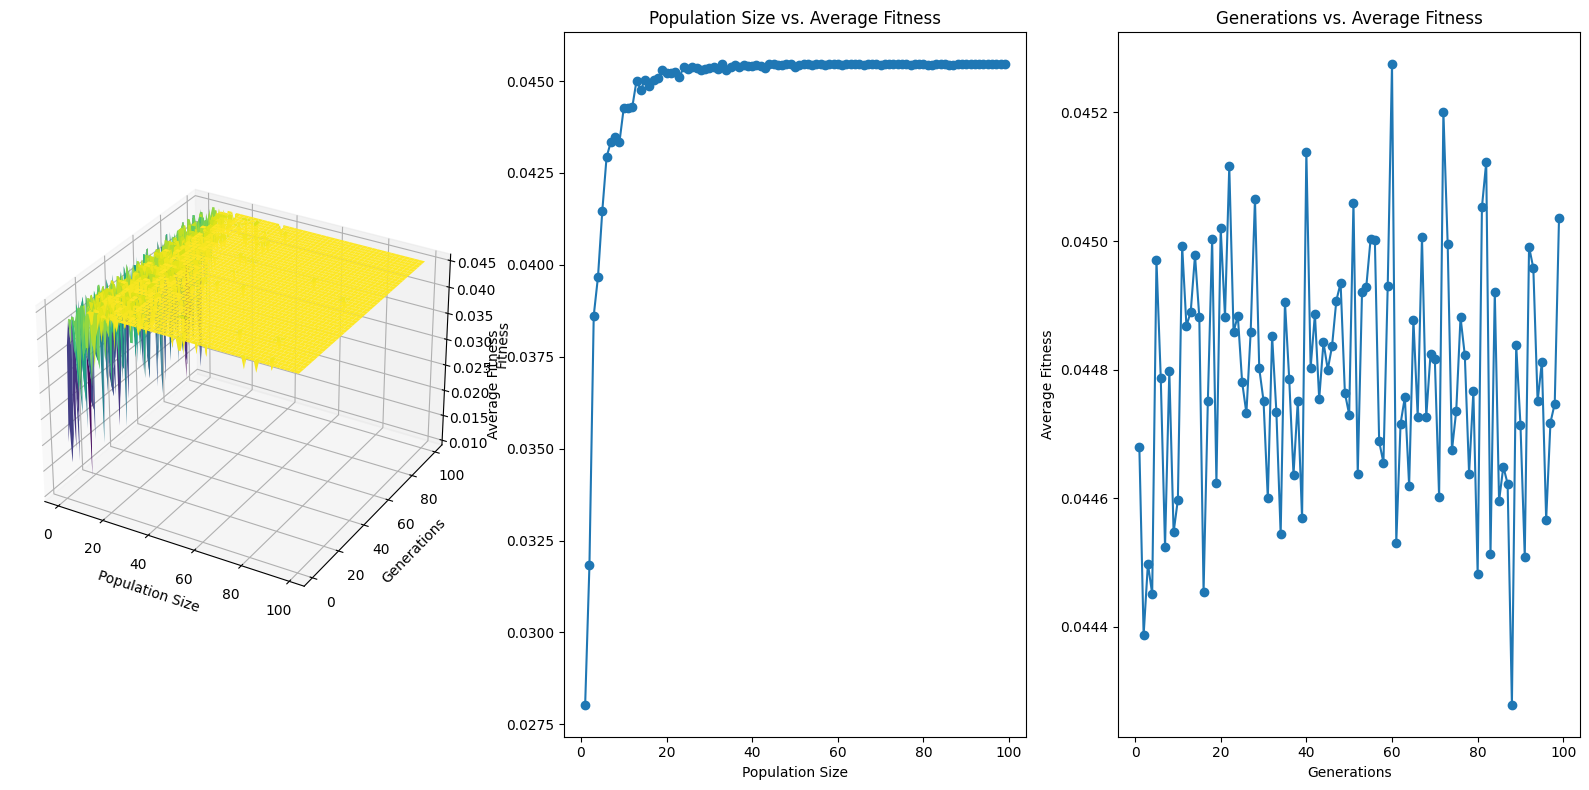

In [38]:
plot('El Rosario', 'San Lazaro', 'random')

Progress: 16/16 | Currently at 50 generations with population size 25
All simulations completed.
Total simulation time: 1685.78957 seconds.
Mean Fitness: 0.06
Median Fitness: 0.06
Standard Deviation of Fitness: 0.00
Best Fitness: 0.06
Best Path: ['Bellas Artes', 'Salto del Agua', 'Chabacano', 'Santa Anita', 'Atlalilco', 'Tlahuac']


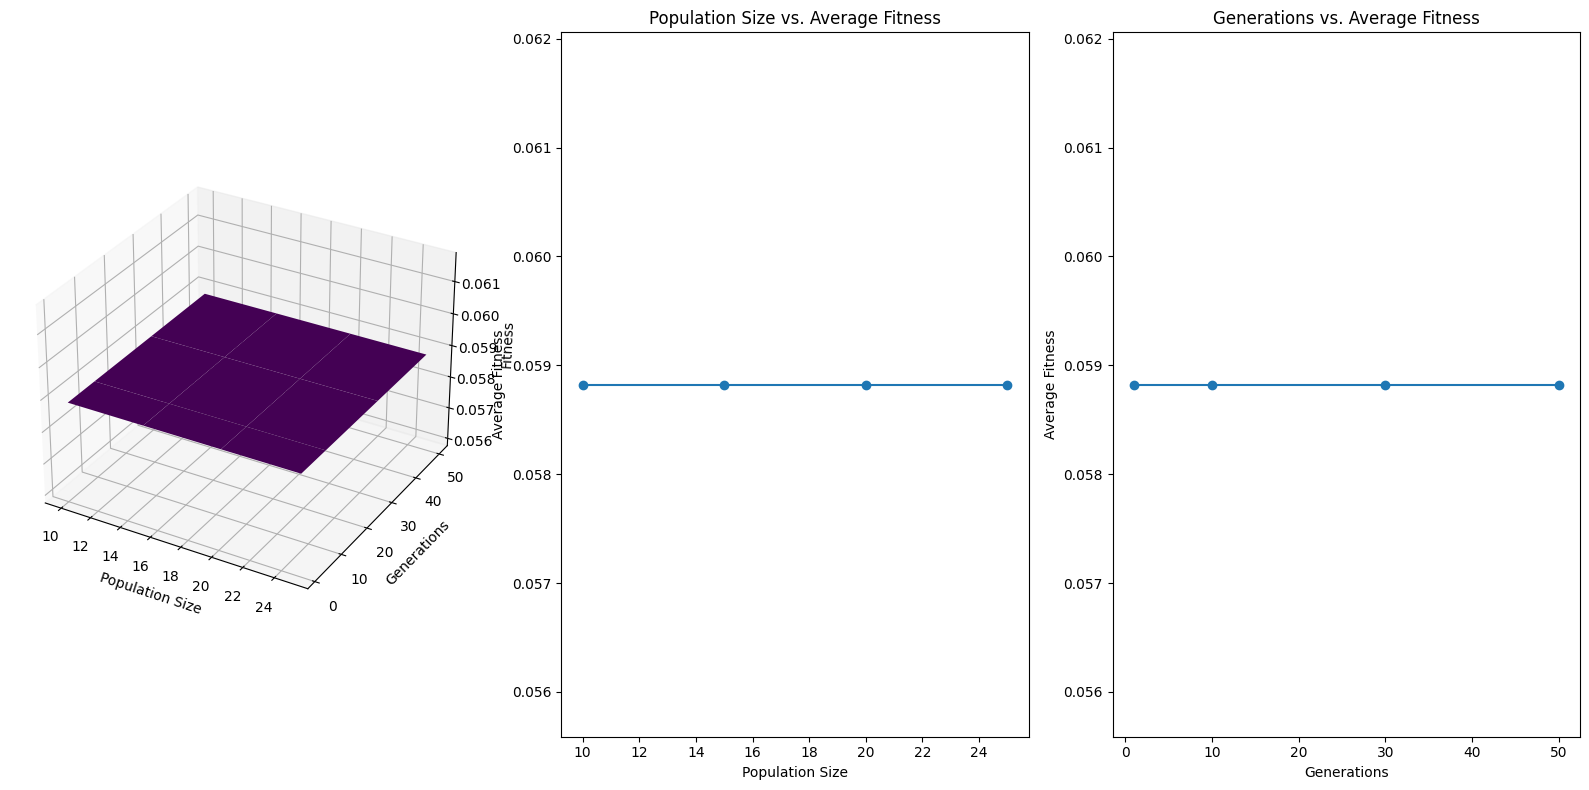

In [47]:
plot('Bellas Artes', 'Tlahuac')

Progress: 9801/9801 | Currently at 99 generations with population size 99
All simulations completed.
Total simulation time: 1470.28870 seconds.
Mean Fitness: 0.06
Median Fitness: 0.06
Standard Deviation of Fitness: 0.01
Best Fitness: 0.06
Best Path: ['Bellas Artes', 'Pino Suarez', 'Chabacano', 'Ermita', 'Atlalilco', 'Tlahuac']


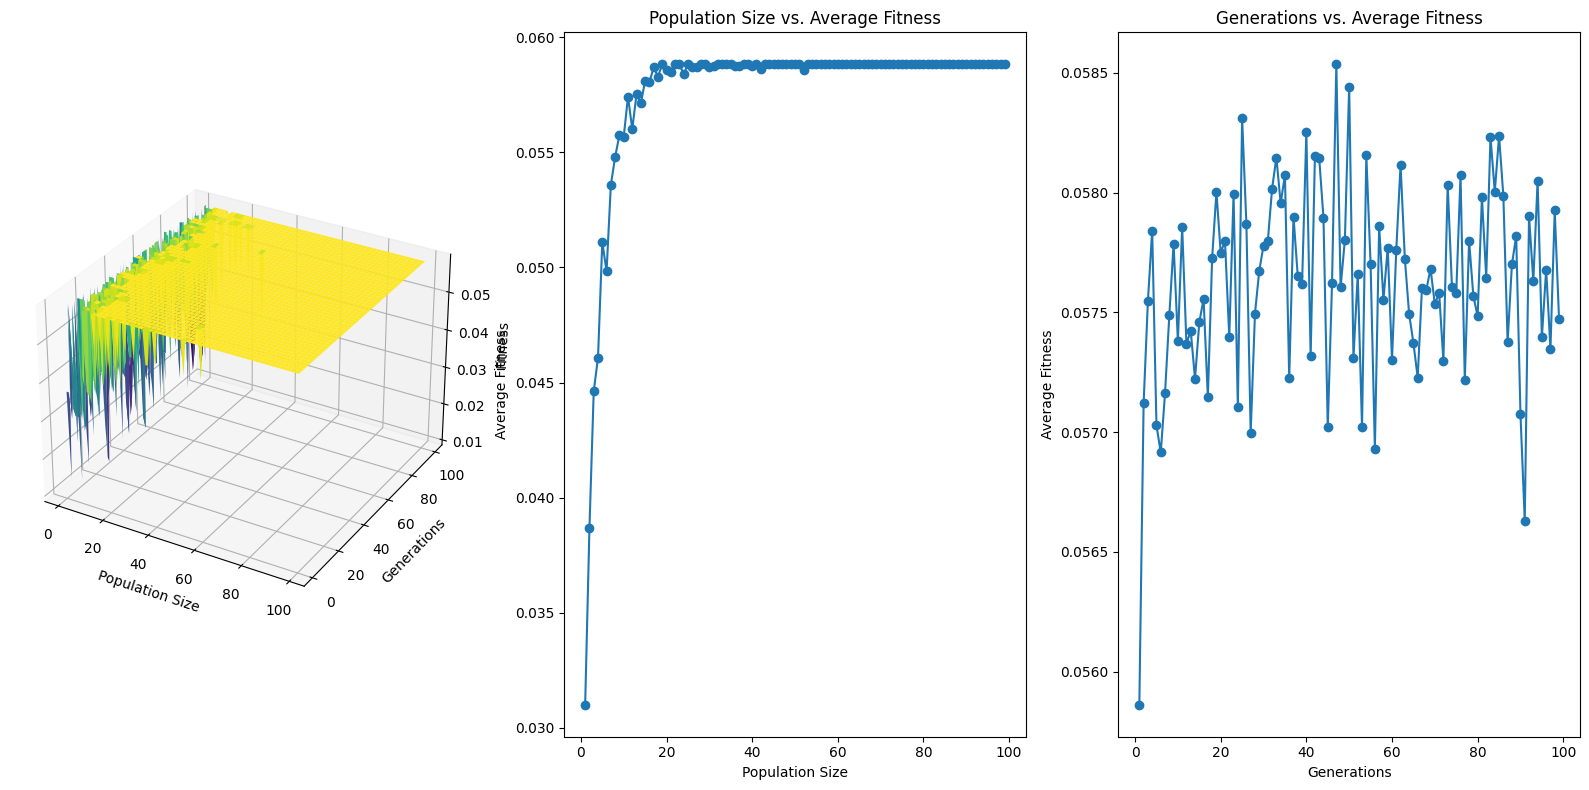

In [37]:
plot('Bellas Artes', 'Tlahuac', 'random')